In [129]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint, solve_ivp
import ipywidgets
from ipywidgets import interact
%matplotlib inline

## 1)Van der Pol


In [130]:
def vanDerPole(x, t, w, u, k, lm):
    return [x[1],-w**2*x[0]+u*(1-x[0]**2)*x[1]+k*x[0]*np.cos(lm*t)]
w = 1
k = 1
lm = 1
def plot_system(x0, y0, u, time):
    t = np.arange(0, time, 0.001)
    x = odeint(vanDerPole, [x0, y0], t, args=(w, u, k, lm))
    plt.plot(x[:,0], x[:,1])
    plt.plot([x[0,0]],[x[0,1]],'ro') 
    plt.plot([x[-1,0]],[x[-1,1]],'r>')
    plt.title('vanDerPole')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
interact(plot_system,x0=(-10,10,1),y0=(-10,10,1),u=(0,1,0.1),k=(0.8,1.2,0.1),lm=(0.8,1.2,0.1),time=(0,300))   

interactive(children=(IntSlider(value=0, description='x0', max=10, min=-10), IntSlider(value=0, description='y…

<function __main__.plot_system(x0, y0, u, time)>

## 2)Mathieu

In [131]:
def Mathieu(x, t, w, e, lm):
    return [x[1],-(w**2+e*np.cos(lm*t)*x[0])]
w = 1
lm = 1
def plot_system(x0, y0, e, time):
    t = np.arange(0, time, 0.001)
    x = odeint(Mathieu, [x0, y0], t, args=(w, e, lm))
    plt.plot(x[:,0], x[:,1])
    plt.plot([x[0,0]],[x[0,1]],'ro') 
    plt.plot([x[-1,0]],[x[-1,1]],'r>') 
    plt.title('Mathieu')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)    
interact(plot_system,x0=(-10,10,1),y0=(-10,10,1),w=(0.8,1.2,0.1),e=(0,1,0.1),lm=(0.8,1.2,0.1),time=(1,300))   

interactive(children=(IntSlider(value=0, description='x0', max=10, min=-10), IntSlider(value=0, description='y…

<function __main__.plot_system(x0, y0, e, time)>

## 3)Duffing oscillator

In [132]:
def Duffing(x, t, w, e, lm, k):
    return [x[1],-(w**2)*x[0]-e*x[0]**3+k*np.cos(lm*t)]
w = 1
k = 1
lm = 1
def plot_Duffing(x0, y0, e, time):
    t = np.arange(0, time, 0.001)
    x = odeint(Duffing, [x0, y0], t, args=(w, e, lm, k))
    plt.plot(x[:,0], x[:,1]) 
    plt.plot([x[0,0]],[x[0,1]],'ro')
    plt.plot([x[-1,0]],[x[-1,1]],'r>') 
    plt.title('Duffing oscillator')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)  
interact(plot_Duffing,x0=(-10,10,1),y0=(-10,10,1),w=(0.8,1.2,0.1),e=(0,1,0.1),lm=(0.8,1.2,0.1),k=(0.8,1.2,0.1),time=(1,300))  

interactive(children=(IntSlider(value=0, description='x0', max=10, min=-10), IntSlider(value=0, description='y…

<function __main__.plot_Duffing(x0, y0, e, time)>

## 4)Pendulum

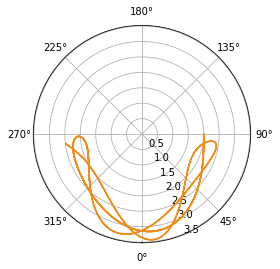

In [133]:
def Pendulum(t, new):
    r, d_r, phi, d_phi = new         
    g = 9.81    
    ar = (-k*(r-l) + m*r*d_phi**2 + m*g*np.cos(phi))/m
    aphi = (-g*np.sin(phi) - 2*d_r*d_phi)/r
    return [d_r, ar, d_phi, aphi]

m = 1
k = 25
l = 2
r0 = 2
d_r0 = 0
phi0 = np.pi/2
d_phi0 = 0

add = solve_ivp(Pendulum, (0, 15), (r0, d_r0, phi0, d_phi0), args=(m, k, l), max_step=10**-2)
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(add.y[2], add.y[0], color='#ee8d18')
ax.set_theta_zero_location("S")